# Finding Heavy Traffic Indicators on I-94

## Introduction

For our next project, we will be analyzing a dataset about westbound traffic on [Interstate 94](https://en.wikipedia.org/wiki/Interstate_94). It is an east-west interstate highway that runs between Detroit in the east and Billings, Montana in the west. Our dataset, found [here](https://archive.ics.uci.edu/dataset/492/metro+interstate+traffic+volume) and created by John Hogue, contains information on I-94 westbound traffic volume for MN DoT ATR station 301, roughly midway between Minneapolis and St. Paul, Minnesota.

The goal of our analysis is to determine a few indicators of heavy traffic on I-94. These indicators can be weather type, time of the day, time of the week, etc. This project is also our opportunity to put together and practice all the exploratory data visualization skills we recently learned.

## Getting Started

Let's read our file into pandas and get a look at what we're working with.

In [2]:
import pandas as pd
i_94 = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')
i_94.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [3]:
i_94.tail()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
48199,None,283.45,0.0,0.0,75,Clouds,broken clouds,2018-09-30 19:00:00,3543
48200,None,282.76,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 20:00:00,2781
48201,None,282.73,0.0,0.0,90,Thunderstorm,proximity thunderstorm,2018-09-30 21:00:00,2159
48202,None,282.09,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 22:00:00,1450
48203,None,282.12,0.0,0.0,90,Clouds,overcast clouds,2018-09-30 23:00:00,954


In [4]:
i_94.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


The dataset has 48,204 rows and 9 columns. There are no null values. Data collection began on October 2, 2010 at 9am and ended on September 30, 2018 at 11pm. Each row describes traffic and weather data at a specific hour.

We should keep in mind that, as mentioned in the introduction, these data are from one MN DoT station and are only about the westbound traffic in the proximity of that station. This means we should avoid generalizing our results for the entire I-94 highway.

## Analyzing Traffic Volume

Now we're going to plot a histogram to visualize the distribution of the `traffic_volume` column. We're going to do so using Matplotlib.

As a reminder, when we use Matplotlib inside Jupyter, we also need to add the `%matplotlib inline` magic. This enables Jupyter to generate the graphs. We only need to run `%matplotlib inline` once inside a notebook. So, no matter how many cells or graphs we plot, adding it in the first cell is enough.

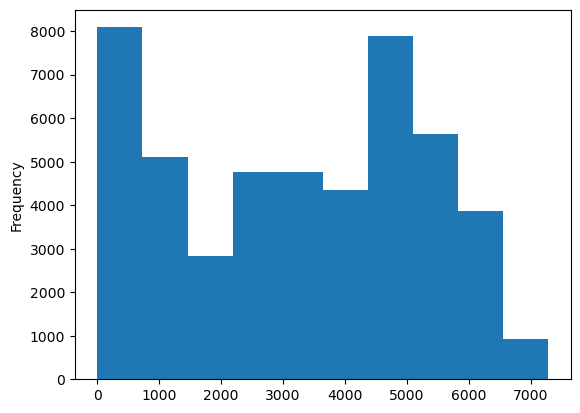

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

i_94['traffic_volume'].plot.hist()
plt.show()

In [6]:
i_94['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

Within our dataset, the range varies between 0 and 7,280 cars, with a mean of 3,260 cars. The graphs shows that a frequency of more than 7,500 cars in an hour is rare (less than 1,000 times), while 0-500 and 4,500-5,000 cars in an hour are most common (about 8,000 times each). Nearly all other values show frequencies between 3,000 and 5,000 recorded hours.

Together, these observations could suggest a daytime/nighttime pattern to the data, with more cars on the road during the day. Let's explore further to find out.

## Traffic Volume: Day vs. Night

To begin exploring, we'll divide the dataset into two parts:

- Daytime data: hours from 7am to 7pm (12 hours)
- Nighttime data: hours from 7pm to 7am (12 hours)

While this is not a perfect criterion for distinguishing between nighttime and daytime, it's a good starting point. Now we're going to transform the data in the `date_time` column to `datetime` format to allow us to work with the data better.

In [7]:
i_94['date_time'] = pd.to_datetime(i_94['date_time'])
i_94['date_time'].dt.hour

0         9
1        10
2        11
3        12
4        13
         ..
48199    19
48200    20
48201    21
48202    22
48203    23
Name: date_time, Length: 48204, dtype: int64

In [8]:
day = i_94.copy()[(i_94['date_time'].dt.hour >= 7) & (i_94['date_time'].dt.hour < 19)]
print(day.shape)

night = i_94.copy()[(i_94['date_time'].dt.hour < 7) | (i_94['date_time'].dt.hour >= 19)]
print(night.shape)

(23877, 9)
(24327, 9)


Now that we've isolated both the daytime and nighttime data, we're going to compare the traffic volume for both times of day using two histograms side by side on a grid chart.

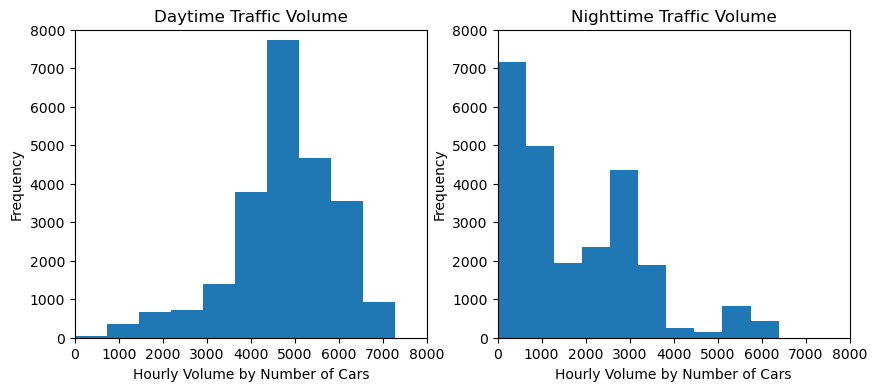

In [9]:
plt.figure(figsize=(10,4))

plt.subplot(1, 2, 1)
plt.hist(day['traffic_volume'])
plt.title('Daytime Traffic Volume')
plt.xlabel('Hourly Volume by Number of Cars')
plt.ylabel('Frequency')
plt.xlim(0, 8000)
plt.ylim(0, 8000)

plt.subplot(1, 2, 2)
plt.hist(night['traffic_volume'])
plt.title('Nighttime Traffic Volume')
plt.xlabel('Hourly Volume by Number of Cars')
plt.ylabel('Frequency')
plt.xlim(0, 8000)
plt.ylim(0, 8000)

plt.show()

In [10]:
day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [11]:
night['traffic_volume'].describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

The daytime traffic histogram has a shape approximating a normal distribution but is slightly left skewed, with a mode around 4500. This means that most of the values in the daytime dataset are higher — there are 4,252 or more cars passing the station each hour 75% of the time.

The nighttime histogram is much more right skewed. This one shows there are 2,819 or fewer cars passing the station each hour 75% of the time.

Because our project goal is to find indicators of heavy traffic, and night traffic appears to be light, we will exclude the nighttime data from our analysis moving forward.

## Time Indicators

As we've just seen, time can be one indicator of heavy traffic. Along with day/night differences, traffic can also depend on certain hours of the day, and more broadly, certain days or months of the year.

We're going to look at a few line plots showing how the traffic volume changed according to the following parameters:

- Month
- Day of the week
- Time of day

### Traffic by Month

We'll start by getting the average traffic volume for each month. We're going to create a new column `month` where each value describes the month when the traffic volume measurement was taken. Then we'll use the `DataFrame.groupby()` method to group the dataset by the `month` column with the mean as an aggregate function.

In [12]:
day['month'] = day['date_time'].dt.month
by_month = day.groupby('month').mean()
by_month['traffic_volume']

/var/folders/lz/wv9m9gfx53d1mh41fycw1lv80000gn/T/ipykernel_10864/2089308581.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_month = day.groupby('month').mean()


month
1     4495.613727
2     4711.198394
3     4889.409560
4     4906.894305
5     4911.121609
6     4898.019566
7     4595.035744
8     4928.302035
9     4870.783145
10    4921.234922
11    4704.094319
12    4374.834566
Name: traffic_volume, dtype: float64

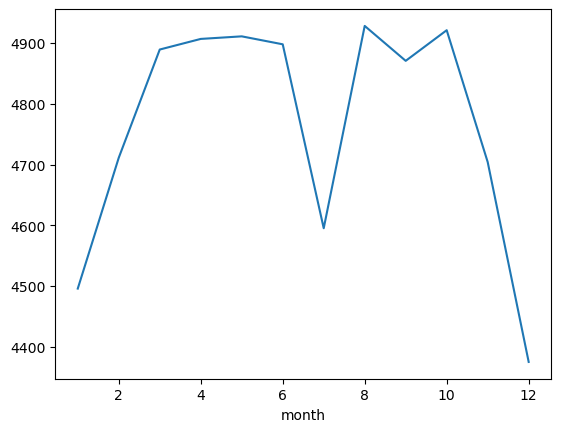

In [13]:
by_month['traffic_volume'].plot.line()
plt.show()

This line plot shows the traffic volume at its lowest in December, likely due to the holidays. The adjacent months of November, January, and February show intermediate levels, and the traffic volume remains high for the rest of the year — except in July, which experiences a sharp dip.

### Traffic by Day of Week

We'll now continue with building line plots for another time unit, day of the week. To get traffic volume averages for each day of the week, we'll use a process similar to the month section.

In [14]:
day['dayofweek'] = day['date_time'].dt.dayofweek
by_dayofweek = day.groupby('dayofweek').mean()
by_dayofweek['traffic_volume']  # 0 is Monday, 6 is Sunday

/var/folders/lz/wv9m9gfx53d1mh41fycw1lv80000gn/T/ipykernel_10864/1778748283.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_dayofweek = day.groupby('dayofweek').mean()


dayofweek
0    4893.551286
1    5189.004782
2    5284.454282
3    5311.303730
4    5291.600829
5    3927.249558
6    3436.541789
Name: traffic_volume, dtype: float64

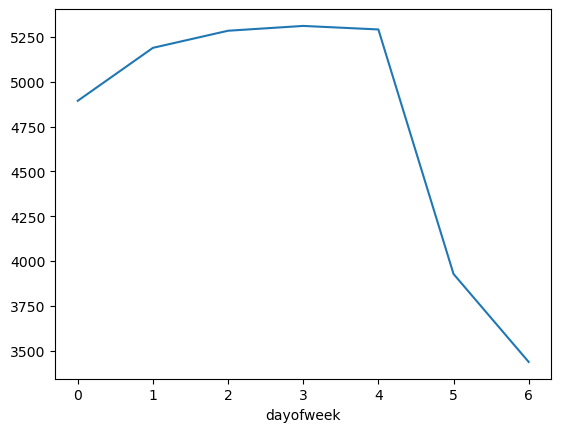

In [15]:
by_dayofweek['traffic_volume'].plot.line()
plt.show()

This line plot clearly demonstrates a significant difference in traffic volume between business days and the weekend.

### Traffic by Time of Day

Finally, we're going to generate a line plot for the time of day. The weekends, however, will drag down the average values, so we're going to look at the averages separately.

In [16]:
day['hour'] = day['date_time'].dt.hour
business_days = day.copy()[day['dayofweek'] <= 4] # 4 == Friday
weekend = day.copy()[day['dayofweek'] >= 5] # 5 == Saturday
by_hour_business = business_days.groupby('hour').mean()
by_hour_weekend = weekend.groupby('hour').mean()

print(by_hour_business['traffic_volume'])
print('\n')
print(by_hour_weekend['traffic_volume'])

hour
7     6030.413559
8     5503.497970
9     4895.269257
10    4378.419118
11    4633.419470
12    4855.382143
13    4859.180473
14    5152.995778
15    5592.897768
16    6189.473647
17    5784.827133
18    4434.209431
Name: traffic_volume, dtype: float64


hour
7     1589.365894
8     2338.578073
9     3111.623917
10    3686.632302
11    4044.154955
12    4372.482883
13    4362.296564
14    4358.543796
15    4342.456881
16    4339.693805
17    4151.919929
18    3811.792279
Name: traffic_volume, dtype: float64


/var/folders/lz/wv9m9gfx53d1mh41fycw1lv80000gn/T/ipykernel_10864/3700938008.py:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_hour_business = business_days.groupby('hour').mean()
/var/folders/lz/wv9m9gfx53d1mh41fycw1lv80000gn/T/ipykernel_10864/3700938008.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_hour_weekend = weekend.groupby('hour').mean()


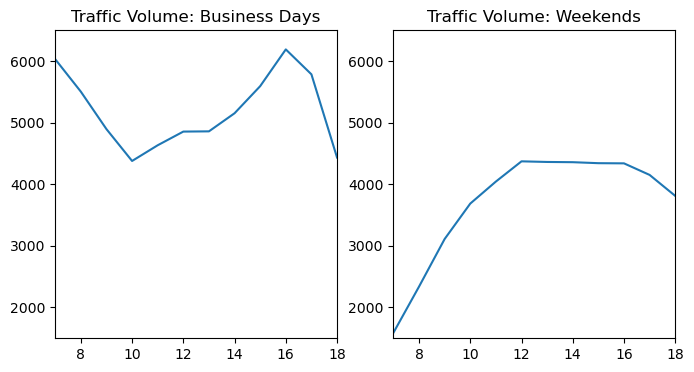

In [17]:
plt.figure(figsize=(8,4))

plt.subplot(1, 2, 1)
plt.plot(by_hour_business['traffic_volume'])
plt.title('Traffic Volume: Business Days')
plt.xlim(7,18)
plt.ylim(1500,6500)

plt.subplot(1, 2, 2)
plt.plot(by_hour_weekend['traffic_volume'])
plt.title('Traffic Volume: Weekends')
plt.xlim(7,18)
plt.ylim(1500,6500)

plt.show()

During business days, rush hours are 7-8am and 4-5pm, with 6,000 cars on the road hourly; there is somewhat less traffic in the middle of the day. On the weekends, traffic is very light in the early mornings and increases until 12pm, after which it stays relatively high until the evening.

Altogether, these time indicator line graphs show us that traffic is heaviest:

- From March through October, with July as an exception
- During the workweek (Monday through Friday)
- On weekdays, rush hours are 7-8am and 4-5pm

## Weather Indicators

Another possible indicator of heavy traffic is weather. The dataset provides us with a few useful columns about weather:

- `temp`: average temperature in kelvin
- `rain-1h`: amount in mm of rain that occurred in the hour
- `snow_1h`: amount in mm of snow that occurred in the hour
- `clouds_all`: percentage of cloud cover
- `weather_main`: short textual description of the current weather
- `weather_description`: longer textual description of the current weather

A few of these columns are numerical so let's start by looking up their correlation values with `traffic_volume`.

In [18]:
day.corr()['traffic_volume']

/var/folders/lz/wv9m9gfx53d1mh41fycw1lv80000gn/T/ipykernel_10864/3421110943.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  day.corr()['traffic_volume']


temp              0.128317
rain_1h           0.003697
snow_1h           0.001265
clouds_all       -0.032932
traffic_volume    1.000000
month            -0.022337
dayofweek        -0.416453
hour              0.172704
Name: traffic_volume, dtype: float64

The weather column with the strongest correlation with `traffic_volume` appears to be `temp`, with a coefficient of just +0.13. Let's make a scatter plot for this column and `traffic_volume`.

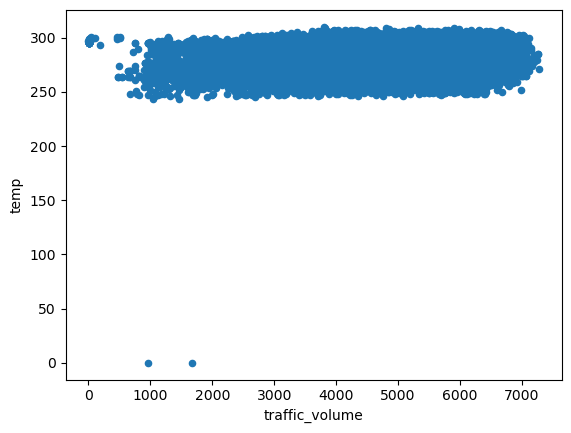

In [19]:
day.plot.scatter('traffic_volume', 'temp')
plt.show()

Let's modify the y-axis to bring it in with the bulk of the data as it appears we have two wrong 0K temperatures messing up the y-axis.

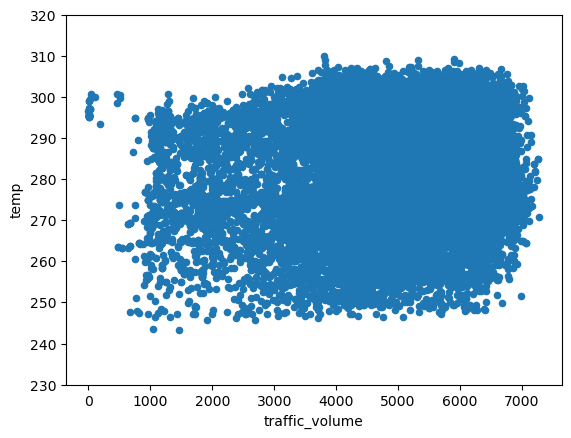

In [20]:
day.plot.scatter('traffic_volume', 'temp')
plt.ylim(230,320)
plt.show()

We can conclude that temperature doesn't look like a solid indicator of heavy traffic. The two incorrect 0K temperatures were likely influencing the stronger correlation coefficient.

## Weather Types

To see if we can find more useful data, we'll look at the next categorical weather-related columns: `weather_main` and `weather_description`.

We're going to calculate the average traffic volume associated with each unique value in these two columns. We'll do this by grouping the data by `weather_main` and `weather_description` while using the mean as an aggregate function, similar to earlier sections.

In [21]:
by_weather_main = day.groupby('weather_main').mean()
by_weather_description = day.groupby('weather_description').mean()

/var/folders/lz/wv9m9gfx53d1mh41fycw1lv80000gn/T/ipykernel_10864/2966152484.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_weather_main = day.groupby('weather_main').mean()
/var/folders/lz/wv9m9gfx53d1mh41fycw1lv80000gn/T/ipykernel_10864/2966152484.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_weather_description = day.groupby('weather_description').mean()


Now let's create a bar plot for the `traffic_volume` column of `by_weather_main` and `by_weather_description`.

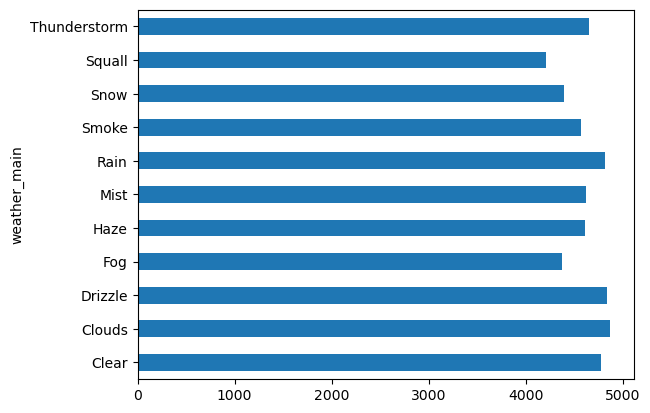

In [22]:
by_weather_main['traffic_volume'].plot.barh()
plt.show()

With each weather type, none show traffic volume exceeding 5,000 cars, and none stand out as a heavy traffic indicator. Let's now take a look at `weather_description`, which has a more granular weather classification.

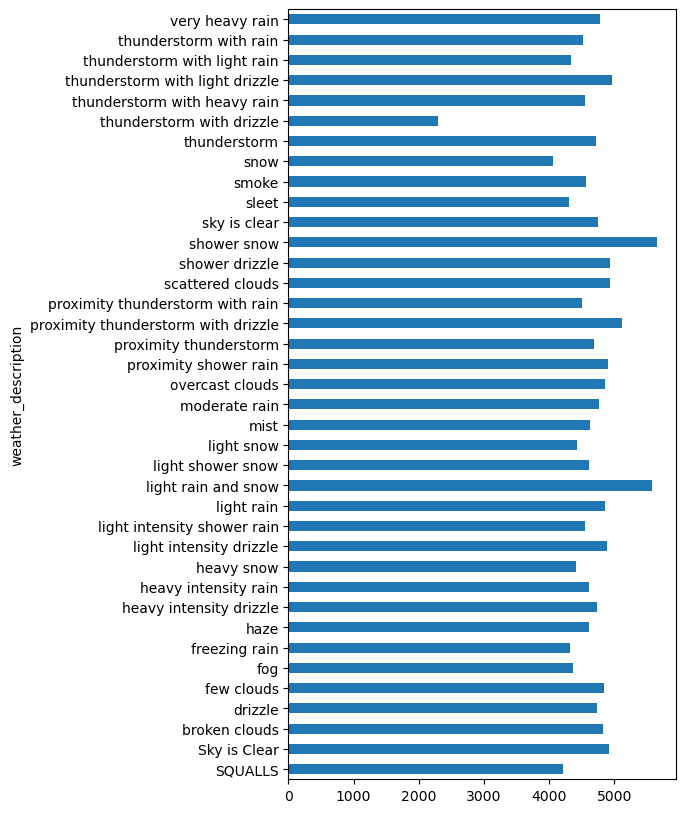

In [23]:
by_weather_description['traffic_volume'].plot.barh(figsize=(5,10))
plt.show()

According to this chart, there are three weather descriptions that are associated with traffic volume exceeding 5,000 cars:

- Shower snow
- Proximity thunderstorm with drizzle
- Light rain and snow

Interestingly, there is also one weather description associated with light traffic volume — thunderstorm with drizzle, with just over 2,000 cars.

It is not clear why the three weather descriptions highlighted above could be indicators of heavy traffic. All three are unpleasant weather, but not that bad. Maybe they cause conditions bad enough to be a traffic inconvenience, but not bad enough to cause people to stay home.

Upon a closer look at the chart, there is one important thing we want to bring to readers' attention. There are two separate weather descriptions, `sky is clear` and `Sky is Clear` that differ only by capitalization. This is something that should have been caught at the data cleaning stage and would definitely have an impact on our conclusions. However, we will leave things as is for now because our explicit focus for this project is exploratory data visualization.

Another question we raise is the actual differences between all the unique values. For example, what distinguishes `very heavy rain` from `heavy intensity rain`, or just plain `drizzle` from all the drizzle subtypes (at least 6)? Some of these categorical values are vague and ambiguous and may not be a reliable reflection of weather conditions to begin with.

## Conclusion

In this project, we tried to find a few indicators of heavy traffic on the I-94 Interstate highway between Minneapolis and St. Paul, Minnesota. We managed to find two types of indicators:

- Time indicators
    - The traffic is usually heavier during warm months (March–October) compared to cold months (November–February).
    - The traffic is usually heavier on business days compared to the weekends.
    - On business days, the rush hours are around 7am and 4pm.
- Weather indicators
    - Shower snow
    - Light rain and snow
    - Proximity thunderstorm with drizzle
    
As for next steps, we suggest the following:

- Clean the data more throroughly to identify and fix errors such as the one mentioned in the last section, and redo all charts to reflect these changes.
- Use the nighttime data to look for heavy traffic indicators.
- As per the suggestions in the last section, find other possible time and weather indicators.